In [87]:
#parte 1: Analizando la base 
#1.a Tenemos que eliminar todas las observaciones que no corresponden a CABA y GBA
import sys
!{sys.executable} -m pip install pandas
import pandas as pd 
#cargamos el archivo de excel 
df = pd.read_excel('usu_individual_T423.xlsx')
print(df )

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0      TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           1   
1      TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           2   
2      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           1   
3      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           2   
4      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           3   
...                              ...   ...        ...        ...         ...   
47332  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           1   
47333  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           2   
47334  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           3   
47335  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           4   
47336  TQRMNOQWQHKMLNCDEIMBF00792561  2023          4          1           1   

       H15  REGION MAS_500  AGLOMERADO 

In [88]:
print(df.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [89]:
aglomerado = 'AGLOMERADO'

#definimos los "IDs" correspondientes a CABA y GBA
ids = [32, 33] 

#filytranos las filas corresponden a CABA y GBA
df_filtrado = df[df[aglomerado].isin(ids)]

#guardamos el DataFrame filtrado en un nuevo archivo excel
df_filtrado.to_excel('datos_filtrados.xlsx', index=False)

In [90]:
print (df_filtrado)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
111    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1   
112    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2   
113    TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
...                              ...   ...        ...        ...         ...   
45768  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
45769  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
45770  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
45771  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
45772  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

       H15  REGION MAS_500  AGLOMERADO 

In [91]:
#1.b eliminamos las columnas IDECCFR, PDECCFR y PDECIFR que aparecen como NAN (explicacion en el informe)
columnas_a_eliminar = ['IDECCFR', 'PDECCFR', 'PDECIFR']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar)

#guardamos el DataFrame filtrado
df_filtrado.to_excel('datos_filtrados.xlsx', index=False)


In [92]:
print (df_filtrado)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
111    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1   
112    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2   
113    TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
...                              ...   ...        ...        ...         ...   
45768  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
45769  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
45770  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
45771  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
45772  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

       H15  REGION MAS_500  AGLOMERADO 

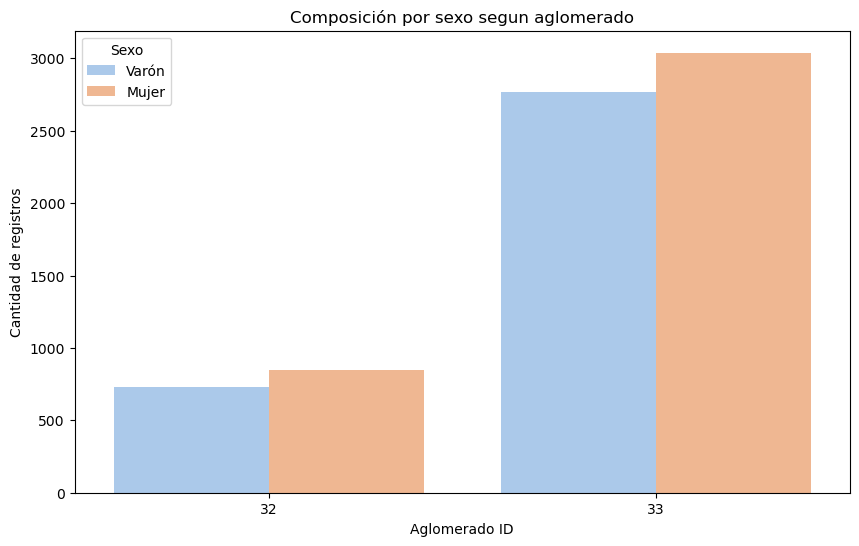

In [93]:
#1.c realizamos un grafico de barras mostrando la composicion por sexo.

import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#renombramos los valores de la columna 'CH04', ya que toma valor 1 cuando es Varon y 2 cuando es Mujer. 
df_filtrado['sexo'] = df_filtrado['CH04'].replace({1: 'Varón', 2: 'Mujer'})

#creamos un gráfico de barras agrupadas de la composición por sexo y por aglomeración
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=df_filtrado, x=aglomerado, hue='sexo', palette='pastel')
plt.title('Composición por sexo segun aglomerado')
plt.xlabel('Aglomerado ID')
plt.ylabel('Cantidad de registros')
plt.legend(title='Sexo')
plt.show()


Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'IDECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR',
       'GDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=174)


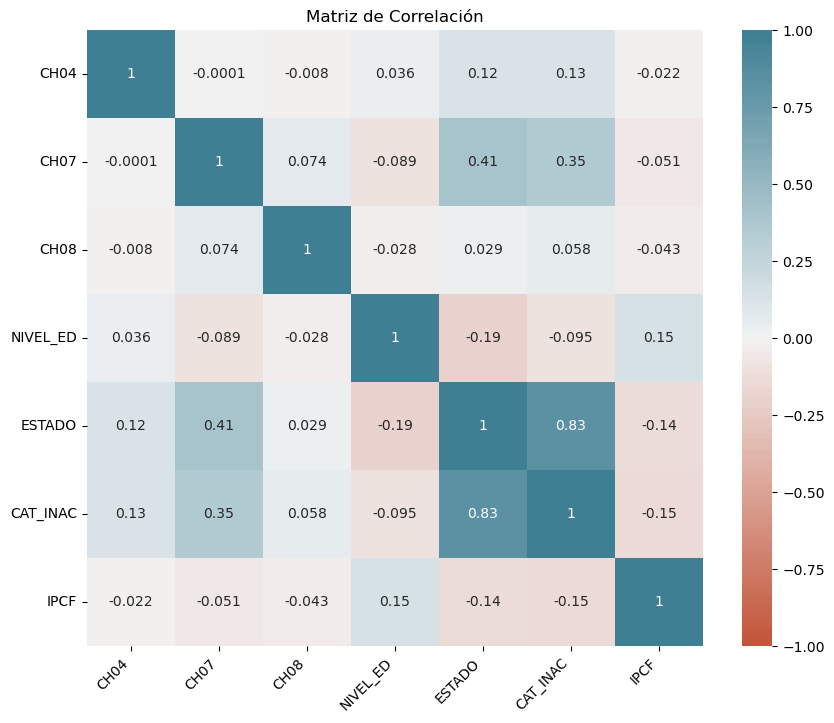

In [94]:
#1.d queremos realizar una matriz de correlacion con las variables: CH04, CH07, CH08, NIVEL ED, ESTADO, CAT INAC, IPCF.

#primero cargamos el archivod de excel con los datos filtrados
data = pd.read_excel('datos_filtrados.xlsx')
print(data.columns)

#seleccionamos las columnas especificadas para la matriz de correlación
variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
data_selected = data[variables]

#calculamos la matriz de correlacion 
corr = data_selected.corr()

#graficamos la matriz de correlacion 
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True  # Añadir valores en las celdas
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.title('Matriz de Correlación')
plt.show()


In [95]:
#1.e  queremos ver: cuantos desocupados, inactivos, la media del IPCF segun estado (ocupado, desocupado, inactivo) en la muestra

import pandas as pd

#cargamos el archivo con los datos filtrados
data = pd.read_excel('datos_filtrados.xlsx')

#la columna 'ESTADO' indica el estado de ocupación, siendo  1 = Ocupado, 2 = Desocupado, 3 = Inactivo

#calculamos la cantidad de desocupados e inactivos.
desocupados = data[data['ESTADO'] == 2].shape[0]
inactivos = data[data['ESTADO'] == 3].shape[0]

print(f"desocupados: {desocupados}")
print(f"inactivos: {inactivos}")

# Calcular la media de IPCF según el estado
# Agrupamos por la columna 'ESTADO' y calculamos la media de 'IPCF'
mean_ipcf_by_estado = data.groupby('ESTADO')['IPCF'].mean()

# Suponiendo que los valores en 'ESTADO' son 1 = Ocupado, 2 = Desocupado, 3 = Inactivo
mean_noresponde = mean_ipcf_by_estado.get(0, float('nan'))
mean_ocupado = mean_ipcf_by_estado.get(1, float('nan'))
mean_desocupado = mean_ipcf_by_estado.get(2, float('nan'))
mean_inactivo = mean_ipcf_by_estado.get(3, float('nan'))
mean_menor_de_10 = mean_ipcf_by_estado.get(4, float('nan'))
print(f"media de IPCF para los menores de 10 años: {mean_menor_de_10}")
print(f"media de IPCF para los que no responden: {mean_noresponde}")
print(f"media de IPCF para ocupados: {mean_ocupado}")
print(f"media de IPCF para desocupados: {mean_desocupado}")
print(f"media de IPCF para inactivos: {mean_inactivo}")


desocupados: 240
inactivos: 2765
media de IPCF para los menores de 10 años: 75351.60983490566
media de IPCF para los que no responden: 0.0
media de IPCF para ocupados: 132041.48649856733
media de IPCF para desocupados: 58012.198416666666
media de IPCF para inactivos: 84993.67688245932


In [96]:
#f.
import pandas as pd

#primero definimos los rangos de edad porque en el excel de adultos equivalentes estan en forma de texto
edad_replace = {
    'Menor de 1 año': -1,
    '1año': 1,
    '2 años': 2,
    '3 años': 3,
    '4 años': 4,
    '5 años': 5,
    '6 años': 6,
    '7 años': 7,
    '8 años': 8,
    '9 años': 9,
    '10 años': 10,
    '11 años': 11,
    '12 años': 12,
    '13 años': 13,
    '14 años': 14,
    '15 años': 15,
    '16 años': 16,
    '17 años': 17,
    '18 a 29 años': list(range(18, 30)),
    '30 a 45 años': list(range(30, 46)),
    '46 a 60 años': list(range(46, 61)),
    '61 a 75 años': list(range(61, 76)),
    'más de 75 años': list(range(76, 110))
}

#cargamos los datos filtrados 
data = pd.read_excel('datos_filtrados.xlsx')

#cargamos "tabla_adulto_equiv.xlsx" considerando solo las filas relevantes
tabla_adulto_equiv = pd.read_excel('tabla_adulto_equiv.xlsx', skiprows=5, nrows=24)
tabla_adulto_equiv.columns = ['edad', 'mujeres', 'varones']

# Convertir la columna 'edad' a string. 
tabla_adulto_equiv['edad'] = tabla_adulto_equiv['edad'].astype(str)

# Preparar la tabla de adultos equivalentes
tabla_adulto_equiv = tabla_adulto_equiv.melt(id_vars=['edad'], var_name='sexo', value_name='adulto_equiv')
tabla_adulto_equiv['sexo'] = tabla_adulto_equiv['sexo'].map({'mujeres': 2, 'varones': 1})

#manejamos los rangos de edad de la tabla.
def expand_ranges(df, edad_replace):
    rows = []
    for _, row in df.iterrows():
        if row['edad'] in edad_replace:
            if isinstance(edad_replace[row['edad']], int):
                rows.append(row)
            else:
                for age in edad_replace[row['edad']]:
                    new_row = row.copy()
                    new_row['edad'] = str(age)
                    rows.append(new_row)
        else:
            rows.append(row)
    return pd.DataFrame(rows)

tabla_adulto_equiv_expanded = expand_ranges(tabla_adulto_equiv, edad_replace)

# Convertir las edades en el DataFrame principal a texto para que coincidan con el formato de tabla_adulto_equiv
data['CH06'] = data['CH06'].astype(str)

# Crear una clave de combinación única para hacer el merge en la tabla expandida
tabla_adulto_equiv_expanded['clave'] = tabla_adulto_equiv_expanded['sexo'].astype(str) + '_' + tabla_adulto_equiv_expanded['edad']
data['clave'] = data['CH04'].astype(str) + '_' + data['CH06']

# Hacer el merge con la tabla de adulto equivalente
data = pd.merge(data, tabla_adulto_equiv_expanded[['clave', 'adulto_equiv']], on='clave', how='left')

# Sumar la columna 'adulto_equiv' por hogar y crear la columna 'ad equiv hogar'
data['ad equiv hogar'] = data.groupby('CODUSU')['adulto_equiv'].transform('sum')

# Guardar el DataFrame con las nuevas columnas en un nuevo archivo Excel
data.to_excel('datos_con_adulto_equiv.xlsx', index=False)

print("Guardado en 'datos_con_adulto_equiv.xlsx'")


Guardado en 'datos_con_adulto_equiv.xlsx'


In [131]:
import pandas as pd
data = pd.read_excel('datos_con_adulto_equiv.xlsx')


In [135]:
#3. identificamos las personas que no reportaron su ingreso total familiar (ITF)
import pandas as pd

# Contar cuántas personas respondieron y no respondieron el ITF
num_respondieron_itf = (data['ITF'] != 0).sum()
num_no_respondieron_itf = (data['ITF'] == 0).sum()

print(f"Cantidad de personas que respondieron el ITF: {num_respondieron_itf}")
print(f"Cantidad de personas que no respondieron el ITF: {num_no_respondieron_itf}")

# Crear DataFrames separados para quienes respondieron y no respondieron el ITF
respondieron_itf = data[data['ITF'] != 0].copy()
no_respondieron_itf = data[data['ITF'] == 0].copy()

# Guardar los nuevos DataFrames en archivo csv
respondieron_itf.to_csv('respondieron_itf.csv', index=False)
no_respondieron_itf.to_csv('no_respondieron_itf.csv', index=False)


Cantidad de personas que respondieron el ITF: 4401
Cantidad de personas que no respondieron el ITF: 2979


In [136]:
print(respondieron_itf)

                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
1     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
4     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
5     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
6     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   
...                             ...   ...        ...        ...         ...   
7375  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
7376  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
7377  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
7378  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
7379  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

      H15  REGION MAS_500  AGLOMERADO  PONDERA  ...

In [137]:
#4.
canasta_basica_total = 132853.3
respondieron_itf['ingreso_necesario'] = canasta_basica_total * respondieron_itf['adulto_equiv']


In [138]:
#5.
respondieron_itf['pobre'] = (respondieron_itf['ITF'] < respondieron_itf['ingreso_necesario']).astype(int)
num_pobres = respondieron_itf['pobre'].sum()

print(f"Cantidad de personas identificadas como pobres: {num_pobres}")


Cantidad de personas identificadas como pobres: 157


In [139]:
print(respondieron_itf)

                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
1     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
4     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
5     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
6     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   
...                             ...   ...        ...        ...         ...   
7375  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
7376  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
7377  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
7378  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
7379  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

      H15  REGION MAS_500  AGLOMERADO  PONDERA  ...

In [110]:
print(respondieron_itf.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'clave',
       'adulto_equiv', 'ad equiv hogar', 'ingreso_necesario', 'pobre'],
      dtype='object', length=179)


In [128]:
#parte 2: Clasificacion
import pandas as pd

respondieronn_itf= pd.read_csv('respondieron_itf.csv', low_memory=False, delimiter=',')
norespondieron_itf= pd.read_csv('no_respondieron_itf.csv', low_memory=False, delimiter=',')


In [129]:
print(respondieron_itf.columns)


Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH',
       'clave', 'adulto_equiv', 'ad equiv hogar'],
      dtype='object', length=177)


In [126]:
#1. lista ajustada de columnas que existen en los datos y deben ser eliminadas
columnas_a_eliminar_ajustadas = [
    'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 
    'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 
    'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 
    'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 
    'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 
    'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 
    'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 
    'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv', 'ad equiv hogar']

#eliminamos las columnas presentes en los datos
columnas_a_eliminar_ajustadas = [col for col in columnas_a_eliminar_ajustadas if col in columnas_respondieron]

#eliminamos las columnas de ingresos de ambas bases de datos
respondieron_limpio = respondieron.drop(columns=columnas_a_eliminar_ajustadas)
norespondieron_limpio = norespondieron.drop(columns=columnas_a_eliminar_ajustadas)

#guardameslas bases de datos limpia en nuevos archivos
respondieron_limpio.to_csv('respondieron_limpio.csv', index=False)
norespondieron_limpio.to_csv('norespondieron_limpio.csv', index=False)


In [127]:
print(respondieron_limpio.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S',
       'PP11T', 'clave'],
      dtype='object', length=126)


In [140]:
#2.
import pandas as pd
from sklearn.model_selection import train_test_split

# Leer el archivo CSV que contiene la columna 'pobre'
respondieron_itf= pd.read_csv('respondieron_itf.csv', low_memory=False, delimiter=',')

# Variables independientes (X) y dependiente (y)
X = respondieron_itf.drop(columns=['pobre'])
y = respondieron_itf['pobre']

# Agregar columna de unos (1) a las variables independientes
X['UNOS'] = 1

# División de los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Verificar la división de los datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


KeyError: "['pobre'] not found in axis"

In [141]:
#3.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

y_pred_logit = logit_model.predict(X_test)

conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_pred_logit)
roc_auc_logit = auc(fpr_logit, tpr_logit)
accuracy_logit = accuracy_score(y_test, y_pred_logit)

print(f"Confusion Matrix:\n{conf_matrix_logit}")
print(f"ROC AUC: {roc_auc_logit}")
print(f"Accuracy: {accuracy_logit}")


NameError: name 'X_train' is not defined

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred_lda = lda_model.predict(X_test)

conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print(f"Confusion Matrix:\n{conf_matrix_lda}")
print(f"ROC AUC: {roc_auc_lda}")
print(f"Accuracy: {accuracy_lda}")

NameError: name 'X_train' is not defined

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"ROC AUC: {roc_auc_knn}")
print(f"Accuracy: {accuracy_knn}")


NameError: name 'X_train' is not defined

In [144]:
#4.
#predicción de pobreza en la base de datos de los que no respondieron
predicciones_no_respondieron = logit_model.predict(norespondieron_limpio)

#.
#agregamos las predicciones al dataframe original
norespondieron_limpio['prediccion_pobre'] = predicciones_no_respondieron

#proporción de las personas que no respondieron identificadas como pobres
proporcion_pobres = norespondieron_limpio['prediccion_pobre'].mean()

print(f"Proporción de personas que no respondieron identificadas como pobres: {proporcion_pobres}")


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [145]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k='all')  # Ajustar 'k' según el número de características relevantes deseadas
selector.fit(X_train, y_train)

#obtener las puntuaciones de las características
scores = selector.scores_
features = X_train.columns

#creamos data frame
importancia_features = pd.DataFrame({'Feature': features, 'Score': scores})
importancia_features = importancia_features.sort_values(by='Score', ascending=False)
print(importancia_features)

NameError: name 'X_train' is not defined